In [ ]:
import nltk
import re
from collections import Counter
from tqdm import tqdm
from scipy.sparse import csr_matrix
import math
import operator
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
# nltk.download('all')

- https://www.youtube.com/watch?v=okcqWyAzo4k&list=PLtCBuHKmdxOefxJhd6u8KY9vTN8G5D5yG

- https://www.youtube.com/watch?v=JpxCt3kvbLk&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm

## Tokenization

In [ ]:
text = """
In Indian history, our nation has come across a situation, all at a time, an ascending economic trajectory, continuously rising foreign exchange reserves, increasing domestic investment with investors’ confidence rising steadily, global successes of Indian managerial and entrepreneurial talents, global recognition of technological competence, energy of 540 million youth, umbilical connectivities of more than 25 million people of Indian origin in various parts of the planet and the interest shown by many developed countries to invest in our engineers and scientists through setting up of new Research and Development Centres in India.

The distinction between the public and the private sectors and the illusory primacy of one over the other is vanishing. Also, there is a trend that many young people are opting for creating new enterprises instead of being mere employees.

Providing leadership for the one billion people with multi-cultural, multi-language and multi-religious backgrounds is indeed the core competence of our nation. Our technological competence and value systems with civilisational heritage are highly respected by the world community. Also, Foreign Institutional Investors find investing in India attractive as the returns are high and assured. Indian industrialists are also investing abroad and opening new business ventures.
"""

In [ ]:
# SENTENCE TOKENIZER
sent = nltk.sent_tokenize(text)
print(sent)

['\nIn Indian history, our nation has come across a situation, all at a time, an ascending economic trajectory, continuously rising foreign exchange reserves, increasing domestic investment with investors’ confidence rising steadily, global successes of Indian managerial and entrepreneurial talents, global recognition of technological competence, energy of 540 million youth, umbilical connectivities of more than 25 million people of Indian origin in various parts of the planet and the interest shown by many developed countries to invest in our engineers and scientists through setting up of new Research and Development Centres in India.', 'The distinction between the public and the private sectors and the illusory primacy of one over the other is vanishing.', 'Also, there is a trend that many young people are opting for creating new enterprises instead of being mere employees.', 'Providing leadership for the one billion people with multi-cultural, multi-language and multi-religious back

In [ ]:
# WORD TOKENIZER -> Removes Punctuations and then splits words
word = nltk.word_tokenize(text)
word

['In',
 'Indian',
 'history',
 ',',
 'our',
 'nation',
 'has',
 'come',
 'across',
 'a',
 'situation',
 ',',
 'all',
 'at',
 'a',
 'time',
 ',',
 'an',
 'ascending',
 'economic',
 'trajectory',
 ',',
 'continuously',
 'rising',
 'foreign',
 'exchange',
 'reserves',
 ',',
 'increasing',
 'domestic',
 'investment',
 'with',
 'investors',
 '’',
 'confidence',
 'rising',
 'steadily',
 ',',
 'global',
 'successes',
 'of',
 'Indian',
 'managerial',
 'and',
 'entrepreneurial',
 'talents',
 ',',
 'global',
 'recognition',
 'of',
 'technological',
 'competence',
 ',',
 'energy',
 'of',
 '540',
 'million',
 'youth',
 ',',
 'umbilical',
 'connectivities',
 'of',
 'more',
 'than',
 '25',
 'million',
 'people',
 'of',
 'Indian',
 'origin',
 'in',
 'various',
 'parts',
 'of',
 'the',
 'planet',
 'and',
 'the',
 'interest',
 'shown',
 'by',
 'many',
 'developed',
 'countries',
 'to',
 'invest',
 'in',
 'our',
 'engineers',
 'and',
 'scientists',
 'through',
 'setting',
 'up',
 'of',
 'new',
 'Researc

## Stemming and Lemmatization

**Stemming**: Returns stem of word <br>
**Lemmatization**: Returns stem but meaningful words

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
# remove stopwords
sents = nltk.sent_tokenize(text)
print(sents[0])
for i,sent in enumerate(sents):
  sents[i] = " ".join([word for word in sent.split(" ") if word not in set(stopwords.words('english'))])
print(sents[0])


In Indian history, our nation has come across a situation, all at a time, an ascending economic trajectory, continuously rising foreign exchange reserves, increasing domestic investment with investors’ confidence rising steadily, global successes of Indian managerial and entrepreneurial talents, global recognition of technological competence, energy of 540 million youth, umbilical connectivities of more than 25 million people of Indian origin in various parts of the planet and the interest shown by many developed countries to invest in our engineers and scientists through setting up of new Research and Development Centres in India.

In Indian history, nation come across situation, time, ascending economic trajectory, continuously rising foreign exchange reserves, increasing domestic investment investors’ confidence rising steadily, global successes Indian managerial entrepreneurial talents, global recognition technological competence, energy 540 million youth, umbilical connectivities

In [ ]:
WordNetLemmatizer().lemmatize("studying")

'studying'

In [ ]:
words = ["cries","studies","rocks","better","history", "historical","run","runner","running","ran"]


stemmer = SnowballStemmer(language='english')
print("Stemming\n")
for word in words:
  print(word,"->",stemmer.stem(word))

lemma = WordNetLemmatizer()
print("\nLemmatization\n")
for word in words:
  print(word,"->",lemma.lemmatize(word))

Stemming

cries -> cri
studies -> studi
rocks -> rock
better -> better
history -> histori
historical -> histor
run -> run
runner -> runner
running -> run
ran -> ran

Lemmatization

cries -> cry
studies -> study
rocks -> rock
better -> better
history -> history
historical -> historical
run -> run
runner -> runner
running -> running
ran -> ran


### BoW

In [ ]:
from collections import Counter
from scipy.sparse import csr_matrix
from tqdm import tqdm

In [ ]:
def fit(dataset):    
    unique_words = set() # at first we will initialize an empty set
    # check if its list type or not
    if isinstance(dataset, (list,)):
        for row in dataset: # for each review in the dataset
            for word in row.split(" "): # for each word in the review. #split method converts a string into list of words
                if len(word) < 2:
                    continue
                unique_words.add(word)
        unique_words = sorted(list(unique_words))
        vocab = {j:i for i,j in enumerate(unique_words)}
        
        return vocab
    else:
        print("you need to pass list of sentance")

In [ ]:
vocab = fit(["abc def aaa prq", "lmn pqr aaaaaaa aaa abbb baaa"])
print(vocab)

{'aaa': 0, 'aaaaaaa': 1, 'abbb': 2, 'abc': 3, 'baaa': 4, 'def': 5, 'lmn': 6, 'pqr': 7, 'prq': 8}


In [ ]:
def transform(dataset,vocab):
    rows = []
    columns = []
    values = []
    if isinstance(dataset, (list,)):
        for idx, row in enumerate(tqdm(dataset)): 
            word_freq = dict(Counter(row.split()))
            for word, freq in word_freq.items():               
                if len(word) < 2:
                    continue
                col_index = vocab.get(word, -1) 
                if col_index !=-1:
                    rows.append(idx)
                    columns.append(col_index)
                    values.append(freq)
        return csr_matrix((values, (rows,columns)), shape=(len(dataset),len(vocab)))
    else:
        print("you need to pass list of strings")

In [ ]:
strings = ["the method of lagrange multipliers is the economists workhorse for solving optimization problems",
           "the technique is a centerpiece of economic theory but unfortunately its usually taught poorly"]
vocab = fit(strings)
print(list(vocab.keys()))
print()
print(transform(strings, vocab).toarray())

['but', 'centerpiece', 'economic', 'economists', 'for', 'is', 'its', 'lagrange', 'method', 'multipliers', 'of', 'optimization', 'poorly', 'problems', 'solving', 'taught', 'technique', 'the', 'theory', 'unfortunately', 'usually', 'workhorse']



100%|██████████| 2/2 [00:00<00:00, 8895.66it/s]

[[0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 2 0 0 0 1]
 [1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0]]


#### Compare with Inbuilt function

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word')

vec.fit(strings)
feature_matrix_2 = vec.transform(strings)
print(feature_matrix_2.toarray())

[[0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 2 0 0 0 1]
 [1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0]]


## TFIDF

In [ ]:
from collections import Counter
from tqdm import tqdm
from scipy.sparse import csr_matrix
import math
import operator
from sklearn.preprocessing import normalize
import numpy

In [ ]:
corpus = [
     'this is the first document',
     'this document is the second document',
     'and this is the third one',
     'is this the first document',
]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
skl_output = vectorizer.transform(corpus)

print(vectorizer.get_feature_names_out())
print(vectorizer.idf_)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[1.91629073 1.22314355 1.51082562 1.         1.91629073 1.91629073
 1.         1.91629073 1.        ]


In [ ]:
def fit(dataset):
  unique_words = set()
  if isinstance(dataset, (list,)):
    for row in dataset:
      for word in row.split(" "):
        if len(word) < 2:
          continue
        unique_words.add(word)
    unique_words = sorted(list(unique_words))
    vocab = {j:i for i,j in enumerate(unique_words)}
    return vocab
  else:
    print("Enter list of sentences")


In [ ]:
vocab = fit(corpus)
vocab

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'one': 4,
 'second': 5,
 'the': 6,
 'third': 7,
 'this': 8}

In [ ]:
def get_idf(vocab,dataset):
  n = len(dataset)
  idf = {i:n for i in vocab.keys()}

  count_words = []
  if isinstance(dataset, (list,)):
    # save count_dicts of each row
    for row in dataset:
      word_freq = dict(Counter(row.split()))
      count_words.append(word_freq)
    
    #calculate idfs
    for word in vocab.keys():
      count = 0
      for x in count_words:
        if word in x.keys():
          count += 1
      idf[word] = 1 + math.log((1+n)/(1+count))
    # print(idf)
    return idf
  else:
    print("Enter list of sentences")

In [ ]:
idfs = get_idf(vocab,corpus)

In [ ]:
# transform
def transform(dataset, vocab, idfs):
  rows = []
  cols = []
  vals = []
  for idx,row in enumerate(dataset):
    words = [w for w in row.split(" ") if len(w)>1]
    word_freq = dict(Counter(words))

    # calculate tf*idf
    for word,freq in word_freq.items():
      rows.append(idx);
      cols.append(vocab.get(word,-1))
      vals.append( (freq/len(words)) * (idfs[word]) )
  
  print(rows,cols,vals,sep="\n")
  return csr_matrix((vals, (rows,cols)), shape=(len(dataset),len(vocab)))
      


In [ ]:
res = transform(corpus,vocab,idfs)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
[8, 3, 6, 2, 1, 8, 1, 3, 6, 5, 0, 8, 3, 6, 7, 4, 3, 8, 6, 2, 1]
[0.2, 0.2, 0.2, 0.3021651247531982, 0.24462871026284194, 0.16666666666666666, 0.40771451710473655, 0.16666666666666666, 0.16666666666666666, 0.3193817886456925, 0.3193817886456925, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3193817886456925, 0.3193817886456925, 0.2, 0.2, 0.2, 0.3021651247531982, 0.24462871026284194]


In [ ]:

print("\n--Vocabulary--")
print("SKLEARN : ",vectorizer.get_feature_names())
print("CUSTOM   :" ,list(vocab.keys()))

#idfs
print("\n--IDF VALUES--")
print("SKLEARN : ",list(vectorizer.idf_))
print("CUSTOM   :" ,list(idfs.values()))

#output shape
print("\n--OUTPUT SHAPE--")
print("SKLEARN : ",skl_output.shape)
print("CUSTOM   :" ,res.shape)

# tf-idf value for first row
print("\n--TF-IDF of First Sentence--")
print("SKLEARN : ",skl_output[0].toarray())
print("CUSTOM   :" ,res[0].toarray())



--Vocabulary--
SKLEARN :  ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
CUSTOM   : ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

--IDF VALUES--
SKLEARN :  [1.916290731874155, 1.2231435513142097, 1.5108256237659907, 1.0, 1.916290731874155, 1.916290731874155, 1.0, 1.916290731874155, 1.0]
CUSTOM   : [1.916290731874155, 1.2231435513142097, 1.5108256237659907, 1.0, 1.916290731874155, 1.916290731874155, 1.0, 1.916290731874155, 1.0]

--OUTPUT SHAPE--
SKLEARN :  (4, 9)
CUSTOM   : (4, 9)

--TF-IDF of First Sentence--
SKLEARN :  [[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
CUSTOM   : [[0.         0.24462871 0.30216512 0.2        0.         0.
  0.2        0.         0.2       ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Word2Vec


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:


sample = open("alice_text.txt", "r")
s = sample.read()
f = s.replace("\n", " ")

data = []
for i in sent_tokenize(f):
	temp = []
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)

model1 = gensim.models.Word2Vec(data, min_count = 1,size = 100, window = 5)

In [ ]:
# Print results
print("Cosine similarity between 'alice' " +"and 'wonderland' - CBOW : ",	model1.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice' " +"and 'machines' - CBOW : ",	model1.similarity('alice', 'machines'))


Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9992894
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9716141


In [ ]:
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100,window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +"and 'wonderland' - Skip Gram : ",model2.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice' " +"and 'machines' - Skip Gram : ",model2.similarity('alice', 'machines'))


Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.8776449
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.8770036


In [ ]:
my_dict = dict({})
for idx, key in enumerate(model1.wv.vocab):
    my_dict[key] = model1.wv[key]

In [ ]:
my_dict["alice"]

array([ 0.4164409 , -0.19738589,  0.11067086, -0.6248553 , -0.08285171,
       -0.17073992,  0.3349277 ,  0.29170617, -0.15590815, -0.05479072,
       -0.9159177 ,  0.15339078, -0.31803453, -0.25251183, -0.98786414,
       -0.04000729, -0.5188635 ,  0.05297922,  0.2754833 , -0.51460886,
       -0.6097381 , -0.0845284 , -0.4949017 ,  0.5365055 ,  0.30108255,
        0.3793318 , -0.14200695, -0.37151414,  0.1686856 ,  0.04746228,
       -1.1411417 , -0.06251722, -0.26207617, -0.3501414 , -0.9410542 ,
       -0.2816504 , -0.2307448 ,  0.07344933,  0.04322067,  0.3464532 ,
       -0.02681896, -0.07210601, -0.89420694,  0.24857305,  0.08488134,
        0.23495656, -0.34183902,  0.28411585,  0.13595052,  0.4587112 ,
        0.3624266 , -0.97399706,  0.39266124, -0.01000801, -0.2147474 ,
        0.02262375, -0.321964  , -0.0858183 ,  1.0291909 ,  0.02293139,
       -0.25787887, -0.17944294,  0.4773817 ,  0.05202195,  0.49253115,
        0.30045518, -0.15832713,  0.4646548 ,  0.16346993, -0.06

### CBOW Implementation

In [ ]:
import keras
keras.__version__

'2.8.0'

https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html

In [ ]:
norm_bible = pd.read_csv("t_bbe.csv")["t"].values
norm_bible = norm_bible[:10]

In [ ]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]

vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[50:60])

Vocabulary Size: 65
Vocabulary Sample: [('night', 51), ('solid', 52), ('stretching', 53), ('parting', 54), ('from', 55), ('for', 56), ('those', 57), ('second', 58), ('come', 59), ('one', 60)]


In [ ]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] for i in range(start, end) if 0 <= i < sentence_length and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [ ]:
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if i==1:
      print("Dimensions:" ,x.shape, y.shape)
      print(x)
    if 0 not in x[0]:
        #numpy.argwhere() function is used to find the indices of array elements that are non-zero, grouped by element.
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['at', 'the', 'god', 'made'] -> Target (Y): first
Dimensions: (1, 4) (1, 65)
[[ 1 22 12  1]]
Context (X): ['the', 'first', 'made', 'the'] -> Target (Y): god
Context (X): ['first', 'god', 'the', 'heaven'] -> Target (Y): made
Context (X): ['god', 'made', 'heaven', 'and'] -> Target (Y): the
Context (X): ['made', 'the', 'and', 'the'] -> Target (Y): heaven
Context (X): ['the', 'heaven', 'the', 'earth'] -> Target (Y): and
Context (X): ['and', 'the', 'was', 'waste'] -> Target (Y): earth
Context (X): ['the', 'earth', 'waste', 'and'] -> Target (Y): was
Context (X): ['earth', 'was', 'and', 'without'] -> Target (Y): waste
Context (X): ['was', 'waste', 'without', 'form'] -> Target (Y): and
Context (X): ['waste', 'and', 'form', 'and'] -> Target (Y): without


Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 4, 100)            6500      
                                                                 
 lambda_8 (Lambda)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 65)                6565      
                                                                 
Total params: 13,065
Trainable params: 13,065
Non-trainable params: 0
_________________________________________________________________
None


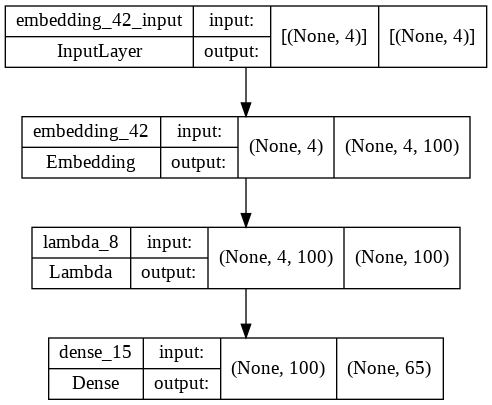

In [ ]:
import keras.backend as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())
tf.keras.utils.plot_model(cbow,show_shapes=True)

In [ ]:
a = np.ones(shape=(4,100))
print(a.shape)
print("ALONG COL: ", np.mean(a, axis=0).shape) # along column
print("ALONG ROW: ",np.mean(a, axis=1).shape) # along row

(4, 100)
ALONG COL:  (100,)
ALONG ROW:  (4,)


In [ ]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 13793.789850950241

Epoch: 2 	Loss: 12435.307305328548

Epoch: 3 	Loss: 11968.230405502021

Epoch: 4 	Loss: 11821.73350750655

Epoch: 5 	Loss: 12141.205444065854



- At the end of the training process, the Embedding layers learns its weights such that its shape = `(vocab_size, req_embedding_size)`
- We can use this as `(1,rem_embedding_size)` vector for each of the words in our vocab

In [ ]:
weights = cbow.get_weights()[0]  # get weights of embedding layer
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(395, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
and,-0.009413,-0.025887,-0.012114,0.041273,-0.014006,0.033322,0.031894,-0.016584,-0.029400,0.002279,...,0.038472,0.024831,-0.021734,-0.037517,0.034412,-0.008134,0.011016,-0.003710,0.038512,-0.049009
of,-0.036384,-0.039683,0.032023,-0.043578,-0.010405,-0.011117,-0.000572,-0.023201,0.022809,0.045260,...,0.036989,-0.012626,-0.037852,-0.040493,0.008539,-0.018230,-0.027292,0.014918,-0.000670,0.007078
to,-0.004759,-0.039369,-0.010719,0.028021,-0.008996,-0.006326,-0.018818,-0.049169,0.021303,-0.039061,...,0.039908,-0.002381,-0.004808,-0.049915,-0.004923,-0.007212,0.039065,0.004695,0.047263,0.004194
god,0.000334,-0.031644,-0.026008,-0.006454,-0.046918,0.016973,0.018859,-0.013218,-0.003844,0.017256,...,0.010329,0.039109,-0.024540,-0.030561,-0.015815,-0.000267,0.017669,-0.038071,0.001110,-0.007021
was,-0.007864,0.015378,0.005407,0.044840,0.020681,-0.012138,0.021403,0.012156,0.013335,-0.018094,...,-0.024711,0.040726,0.021933,0.031170,0.017144,-0.039862,0.016942,-0.005695,-0.035437,-0.001842


### Skipgram

https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html

In [ ]:
from keras.preprocessing.sequence import skipgrams

skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(at (140), the (1)) -> 1
(made (19), young (360)) -> 0
(and (2), the (1)) -> 1
(first (141), the (1)) -> 1
(god (5), the (1)) -> 1
(god (5), tree (38)) -> 0
(heaven (48), the (1)) -> 1
(the (1), themselves (313)) -> 0
(at (140), and (2)) -> 1
(first (141), and (2)) -> 1


In [ ]:
from keras.layers import Input
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Reshape
from keras.layers import dot

input_target = Input((1,))
input_context = Input((1,))

embedding_word = Embedding(vocab_size, embed_size, input_length=1, name='embedding_word')
embedding_context = Embedding(vocab_size, embed_size, input_length=1, name='embedding_context')

word_embedding = embedding_word(input_target)
word_embedding = Reshape((embed_size,))(word_embedding)
context_embedding = embedding_context(input_context)
context_embedding = Reshape((embed_size,))(context_embedding)
 
dot_product = dot([word_embedding, context_embedding], axes=1)
dot_product = Reshape((1,))(dot_product)

# add the sigmoid output layer
output = Dense(1, activation='sigmoid')(dot_product)

model = Model(inputs=[input_target, input_context], outputs=output)
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# view model summary
print(model.summary())


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_word (Embedding)     (None, 1, 100)       39600       ['input_13[0][0]']               
                                                                                                  
 embedding_context (Embedding)  (None, 1, 100)       39600       ['input_14[0][0]']               
                                                                                            

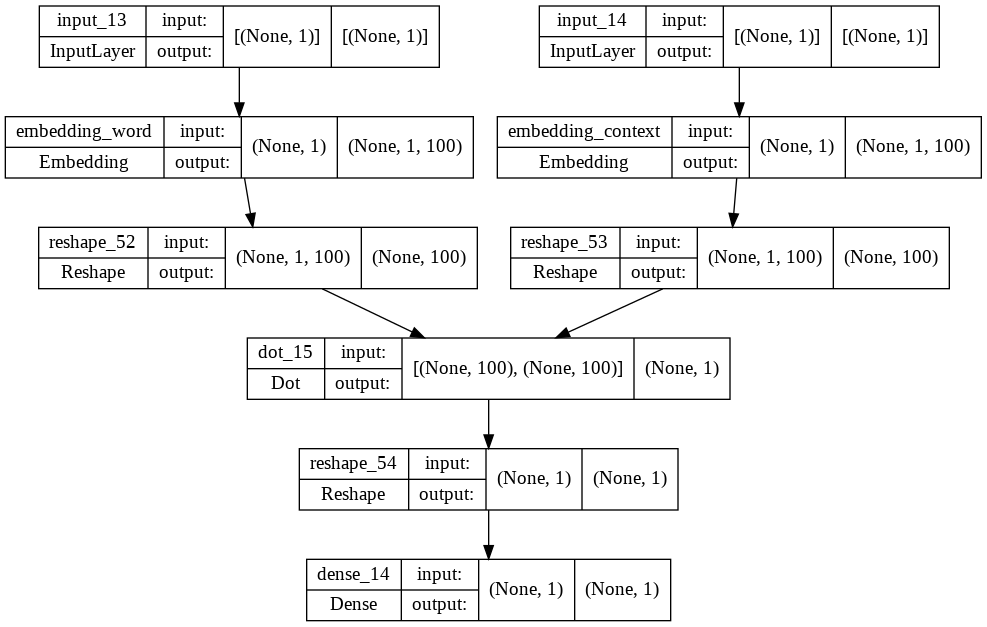

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 10000 == 0:
            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += model.train_on_batch(X,Y)  

    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 24.90896011888981
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 2 Loss: 23.8640066832304
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 3 Loss: 21.612057134509087
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 4 Loss: 19.630773216485977
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 5 Loss: 18.416018277406693


In [ ]:
model.layers

In [ ]:
final_word_embeddings = model.layers[3].get_weights()[0]
print(final_word_embeddings.shape)
pd.DataFrame(final_word_embeddings, index=id2word.values()).head()

(396, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
the,0.025230,-0.017016,-0.035782,-0.040716,-0.046681,-0.030588,0.027890,0.034946,0.007377,-0.002916,...,0.018670,-0.025798,0.035206,0.009027,0.000596,-0.006401,0.003939,-0.015269,-0.011894,0.006102
and,-0.437458,0.375812,-0.412510,0.358369,-0.440884,0.416330,0.345062,-0.356645,0.416243,0.368175,...,0.396446,-0.421902,0.462659,0.383853,0.465079,0.452720,-0.372542,-0.440348,0.458958,0.452200
of,-0.413667,0.394209,-0.366518,0.434141,-0.428521,0.360222,0.381465,-0.412004,0.366733,0.430459,...,0.382291,-0.439990,0.435660,0.426383,0.356345,0.441070,-0.433912,-0.434681,0.459577,0.381301
to,-0.298803,0.363294,-0.332233,0.343325,-0.345885,0.318641,0.313027,-0.275592,0.298526,0.300109,...,0.317640,-0.387663,0.377193,0.303729,0.388261,0.387222,-0.352699,-0.336817,0.318030,0.329915
god,-0.268799,0.220918,-0.236159,0.207489,-0.207012,0.174209,0.164505,-0.253161,0.248925,0.199667,...,0.260534,-0.233245,0.228461,0.273816,0.253398,0.181836,-0.214506,-0.199486,0.226661,0.173013
